In [1]:
import pandas as pd
import os
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import numpy as np
# import plotly.express as px

In [2]:
# import sys
# sys.path.append("../../../lib")
# from juan import *

In [3]:
def show(x):
    print(x.shape)
    return x.head()

In [4]:
models = os.listdir("data")
len(models)

70

In [5]:
data = pd.concat(
    [pd.read_csv("data/" + m).assign(model = m[:-4]) for m in tqdm(models)]
).reset_index(drop = True)
show(data)

  0%|          | 0/70 [00:00<?, ?it/s]

(748, 10)


,column,test_accuracy,test_f1,test_precision,test_recall,train_accuracy,train_f1,train_precision,train_recall,model
0,benefits,0.9,0.0,0.0,0.0,1.000,0.0,0.0,0.0,beto_mtl_weighed_e_2_test
1,culture,0.7,0.0,0.0,0.0,0.675,0.0,0.0,0.0,beto_mtl_weighed_e_2_test
2,dehumanisation,0.3,0.0,0.0,0.0,0.325,0.0,0.0,0.0,beto_mtl_weighed_e_2_test
3,economic,0.9,0.0,0.0,0.0,1.000,0.0,0.0,0.0,beto_mtl_weighed_e_2_test
4,health,1.0,0.0,0.0,0.0,1.000,0.0,0.0,0.0,beto_mtl_weighed_e_2_test


In [6]:
data.model.value_counts()

beto_mtl_weighed_e_2_test                     11
beto_mtl_weighed_e_20_test                    11
beto_mtl_weighed_e_1                          11
mm_bert-base-multilingual-uncased_mtl_e_15    11
beto_mtl_weighed_e_10_test                    11
                                              ..
beto_e_3                                      10
beto_e_3_balanced                             10
rf_char                                       10
beto_e_10                                     10
rf_word                                       10
Name: model, Length: 70, dtype: int64

In [7]:
# data = data.loc[(data.model.str.contains("beto_mtl_e_17") | data.model.str.contains("roberta-base-bne_mtl_e_17")  | data.model.str.contains("roberta-base-bne_mtl_e_15") )]

In [8]:
pivot = data.pivot_table(index = "model", columns = "column", values = "test_f1")\
.assign(mean = lambda df:df.mean(axis = 1))\
.sort_values("task_1", ascending = False)
pivot

column,benefits,culture,dehumanisation,economic,health,migration,others,security,suffering,task_1,xenophobia,mean
model,,,,,,,,,,,,
mm_bert-base-multilingual-uncased_mtl_e_22,0.656739,0.370079,0.103941,0.606646,0.317143,0.641782,0.264428,0.431023,0.311746,0.978947,0.0,0.425680
beto_mtl_e_17,0.669893,0.421845,0.113095,0.512734,0.360000,0.650417,0.209111,0.499345,0.285602,0.968421,0.2,0.444588
mm_bert-base-multilingual-uncased_mtl_e_17,0.651129,0.395724,0.120392,0.498222,0.317143,0.629483,0.061625,0.462579,0.306206,0.968421,0.2,0.419175
mm_bert-base-multilingual-uncased_mtl_e_20,0.612853,0.420352,0.137577,0.574105,0.297143,0.626155,0.102706,0.438107,0.262558,0.957895,0.0,0.402677
beto_mtl_e_15,0.683815,0.448269,0.224608,0.534103,0.273333,0.653947,0.231449,0.479513,0.332172,0.957895,0.0,0.438100
...,...,...,...,...,...,...,...,...,...,...,...,...
lr_word,0.537995,0.265892,0.061818,0.480263,0.354286,0.482830,0.197444,0.324491,0.237101,NaN,0.0,0.294212
rf_char,0.037209,0.116948,0.000000,0.344762,0.180000,0.173420,0.000000,0.067086,0.116484,NaN,0.0,0.103591
rf_word,0.165389,0.152292,0.000000,0.309615,0.180000,0.196215,0.000000,0.045003,0.166484,NaN,0.0,0.121500


In [9]:
to_drop = data.model.str.contains("test")|data.model.str.contains("frozen")
data = data.loc[~to_drop]
show(data)

(522, 10)


,column,test_accuracy,test_f1,test_precision,test_recall,train_accuracy,train_f1,train_precision,train_recall,model
22,benefits,0.963845,0.635018,0.730995,0.596639,0.996660,0.968140,0.978786,0.959728,mm_bert-base-multilingual-uncased_mtl_e_5
23,culture,0.942635,0.387302,0.564000,0.381175,0.988931,0.885747,0.922314,0.873089,mm_bert-base-multilingual-uncased_mtl_e_5
24,dehumanisation,0.980351,0.000000,0.000000,0.000000,0.988277,0.479452,0.899231,0.359462,mm_bert-base-multilingual-uncased_mtl_e_5
25,economic,0.987686,0.486459,0.599394,0.469744,0.997773,0.920474,0.942561,0.902608,mm_bert-base-multilingual-uncased_mtl_e_5
26,health,0.995809,0.160000,0.200000,0.133333,0.998101,0.737647,0.916818,0.636740,mm_bert-base-multilingual-uncased_mtl_e_5


In [31]:
# df.sort_values("test_f1", ascending = False)\
# .reset_index()\
# .assign(model_clean = lambda df: df.model.str.replace(r"_e_[0-9]+", "", regex = True))\
# .sort_values(["model_clean", "test_f1"], ascending = False)\
# .groupby("model_clean").head(1)

# df

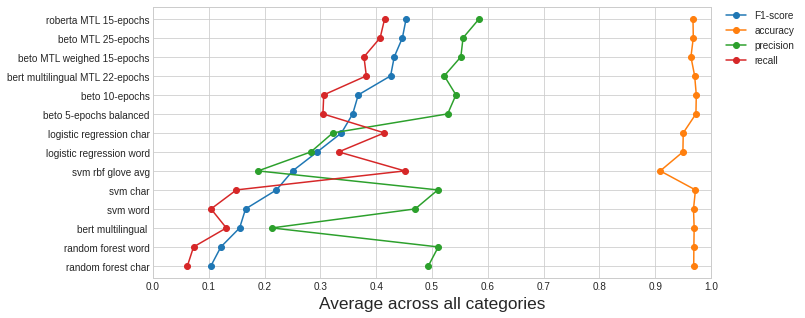

In [18]:
plt.figure(figsize=(10, 5))
df = data.groupby("model")\
[["test_f1", "test_accuracy", "test_precision", "test_recall"]].mean()\
.reset_index()\
.assign(
    model_clean = lambda df: df.model.str.replace(
        r"_e_[0-9]+", 
        "", 
        regex = True
    )
)\
.sort_values(["model_clean", "test_f1"], ascending = False)\
.groupby("model_clean").head(1)\
.drop(columns = "model_clean")\
.assign(
    model = lambda t: t.model.str.lower()\
    .str.replace("[_-]", " ", regex = True)\
    .str.replace(" e ([0-9]+)", " \\1-epochs", regex = True)\
    .str.replace("lr", "logistic regression")\
    .str.replace("rf", "random forest")\
#     .str.replace("svm", "support vector machine")\
    .str.replace(r"(mm|base|bne|uncased) *", "", regex = True)\
    .str.replace("mtl", "MTL")
)\
.set_index("model")\
.sort_values("test_f1", ascending = True)
# .tail(30)

for c in df.columns:
    plt.plot(
        df[c], 
        df.index, 
        "o-", 
        label = c.split('_')[1].replace('f1','F1-score')
    )
plt.legend(
    bbox_to_anchor=(1.02, 1), 
    loc = 'upper left', 
    borderaxespad = 0, 
#     title = "Metric", 
    title_fontsize = "xx-large"
)
plt.xlabel("Average across all categories", fontsize = "xx-large")
# plt.ylabel("Model", fontsize = "xx-large")
plt.xticks(np.linspace(0, 1, 11))
plt.xlim(0, 1)
plt.show()

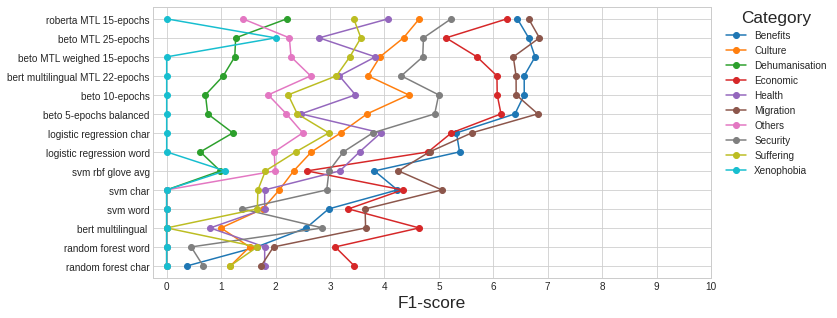

In [30]:
plt.figure(figsize=(10, 5))
metric = "test_f1"

df = data.pivot("model", "column", metric)\
.drop(columns = "task_1")\
.assign(mean = lambda df: df.iloc[:, 1:].mean(axis = 1))\
.sort_values("mean", ascending = True)\
.reset_index()\
.assign(
    model_clean = lambda df: df.model.str.replace(
        r"_e_[0-9]+", 
        "", 
        regex = True
    )
)\
.sort_values(["model_clean", "mean"], ascending = False)\
.groupby("model_clean").head(1)\
.drop(columns = "model_clean")\
.assign(
    model = lambda t: t.model.str.lower()\
    .str.replace("[_-]", " ", regex = True)\
    .str.replace(" e ([0-9]+)", " \\1-epochs", regex = True)\
    .str.replace("lr", "logistic regression")\
    .str.replace("rf", "random forest")\
#     .str.replace("svm", "support vector machine")\
    .str.replace(r"(mm|base|bne|uncased) *", "", regex = True)\
    .str.replace("mtl", "MTL")
)\
.set_index("model")\
.sort_values("mean", ascending = True)
# .tail(30)
# print(df.head(10))

for c in df.columns[:-1]:
    plt.plot(df[c], df.index, "o-", label = c.capitalize())

plt.legend()
plt.legend(
    bbox_to_anchor=(1.02, 1), 
    loc='upper left', 
    borderaxespad=0,
    title = "Category",
    title_fontsize = "xx-large"
)
plt.xlim(-0.025, 1)
plt.xticks(np.linspace(0, 1, 11),[str(i) for i in range(11)])

model_names = ['RoBERTa MTL$_{15}$',
               'BETO MTL$_{25}$',
               'BETO MTL weighted$_{15}$',
               'BERT multilinugal MTL$_{22}$',
               'BETO$_{10}$',
               'BETO balanced$_{5}$',
               'LR$_{char}$',
               'LR$_{word}$',
               'SVM RBF GloVe$_{}$',
               '$_{}$',
               '$_{}$',
               '$_{}$',
               '$_{}$',
    
]
# plt.yticks(np.linspace(0, 15, 15),[str(i) for i in range(15)])
plt.xlabel("F1-score", fontsize = "xx-large")
# plt.ylabel("Model", fontsize = "xx-large")
plt.show()

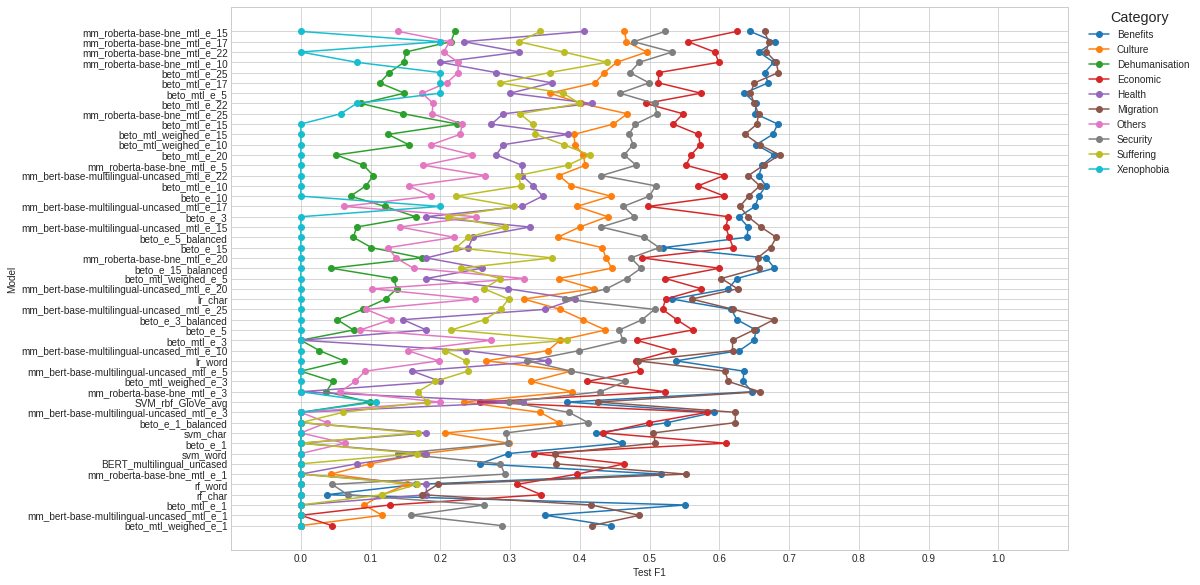

In [34]:
plt.figure(figsize=(15, 10))
metric = "test_f1"

df = data.pivot("model", "column", metric)\
.drop(columns = "task_1")\
.assign(mean = lambda df: df.iloc[:, 1:].mean(axis = 1))\
.sort_values("mean", ascending = True)\
# .tail(30)

for c in df.columns[:-1]:
    plt.plot(df[c], df.index, "o-", label = c.capitalize())

plt.legend()
plt.legend(
    bbox_to_anchor=(1.02, 1), 
    loc='upper left', 
    borderaxespad=0,
    title = "Category",
    title_fontsize = "x-large"
)
plt.xlim(-0.1, 1.1)
plt.xticks(np.linspace(0, 1, 11))
plt.xlabel("Test F1")
plt.ylabel("Model")
plt.show()

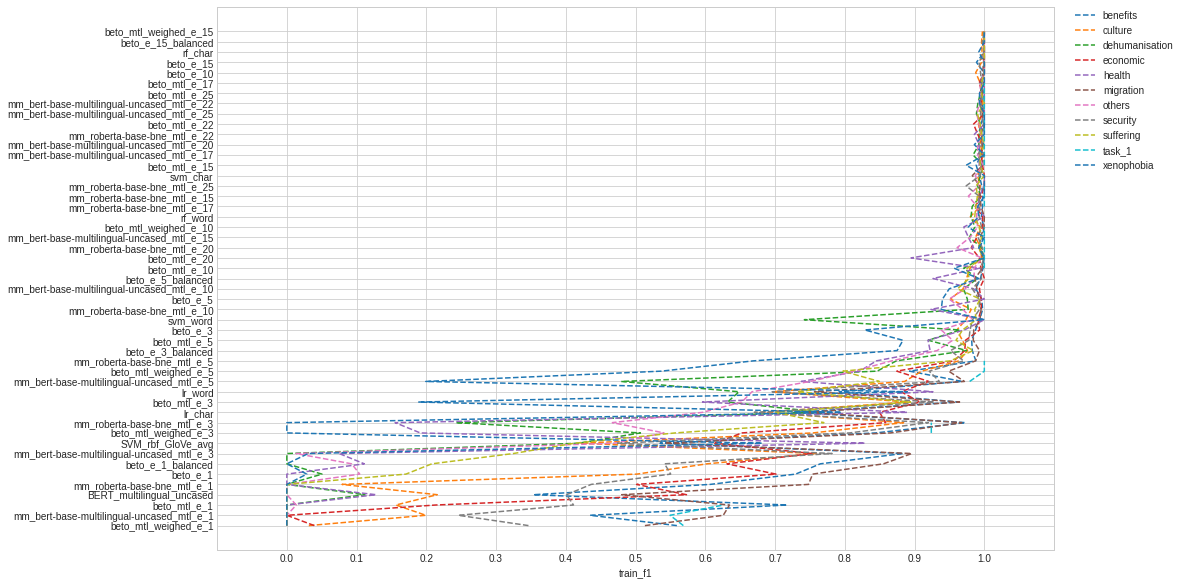

In [35]:
plt.figure(figsize=(15, 10))
metric = "train_f1"

df = data.pivot("model", "column", metric)\
.assign(mean = lambda df: df.iloc[:, 1:].mean(axis = 1))\
.sort_values("mean", ascending = True)\

for c in df.columns[:-1]:
    plt.plot(df[c], df.index, "--", label = c)

plt.legend()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlim(-0.1, 1.1)
plt.xticks(np.linspace(0, 1, 11))
plt.xlabel(metric)
plt.show()

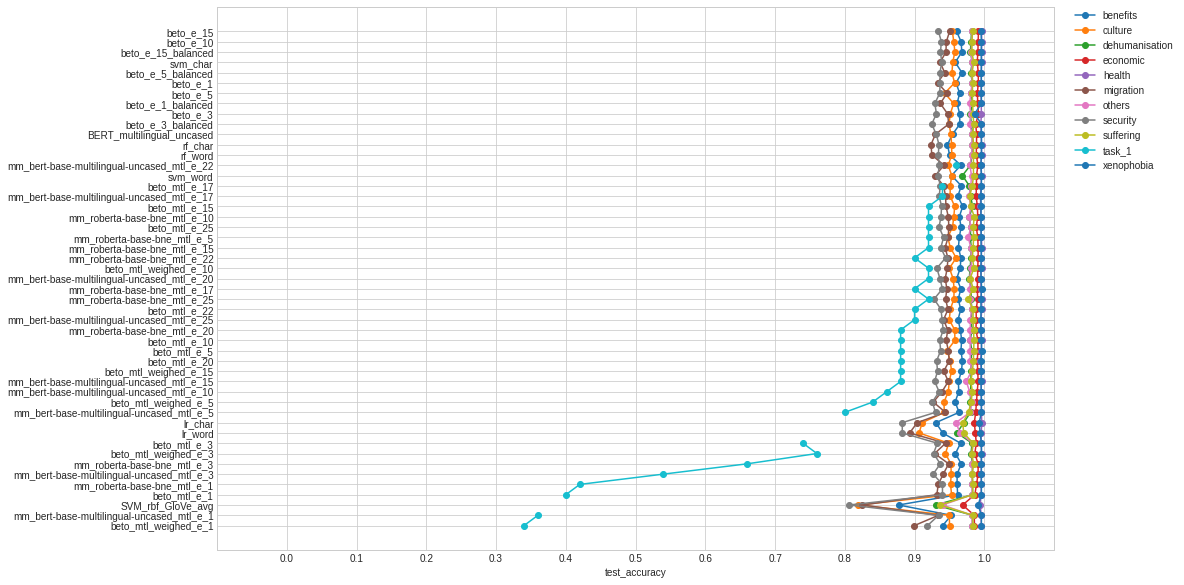

In [36]:
plt.figure(figsize=(15, 10))
metric = "test_accuracy"

df = data.pivot("model", "column", metric)\
.assign(mean = lambda df: df.iloc[:, 1:].mean(axis = 1))\
.sort_values("mean", ascending = True)\

for c in df.columns[:-1]:
    plt.plot(df[c], df.index, "o-", label = c)
    
plt.legend()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlim(-0.1, 1.1)
plt.xticks(np.linspace(0, 1, 11))
plt.xlabel(metric)
plt.show()

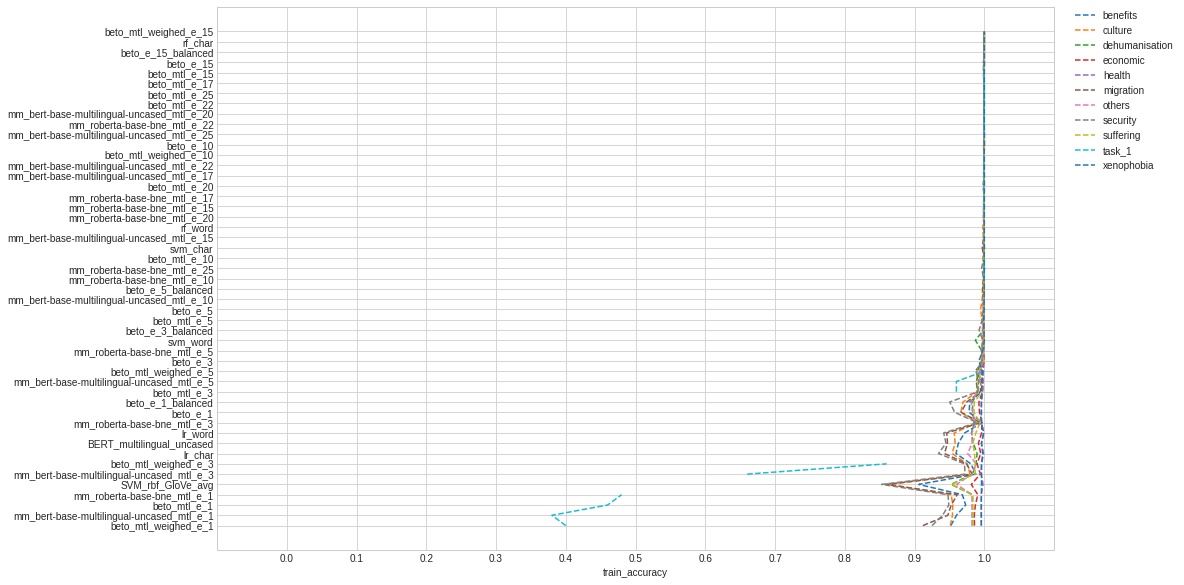

In [37]:
plt.figure(figsize=(15, 10))
metric = "train_accuracy"

df = data.pivot("model", "column", metric)\
.assign(mean = lambda df: df.iloc[:, 1:].mean(axis = 1))\
.sort_values("mean", ascending = True)\

for c in df.columns[:-1]:
    plt.plot(df[c], df.index, "--", label = c)
    
plt.legend()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlim(-0.1, 1.1)
plt.xticks(np.linspace(0, 1, 11))
plt.xlabel(metric)
plt.show()

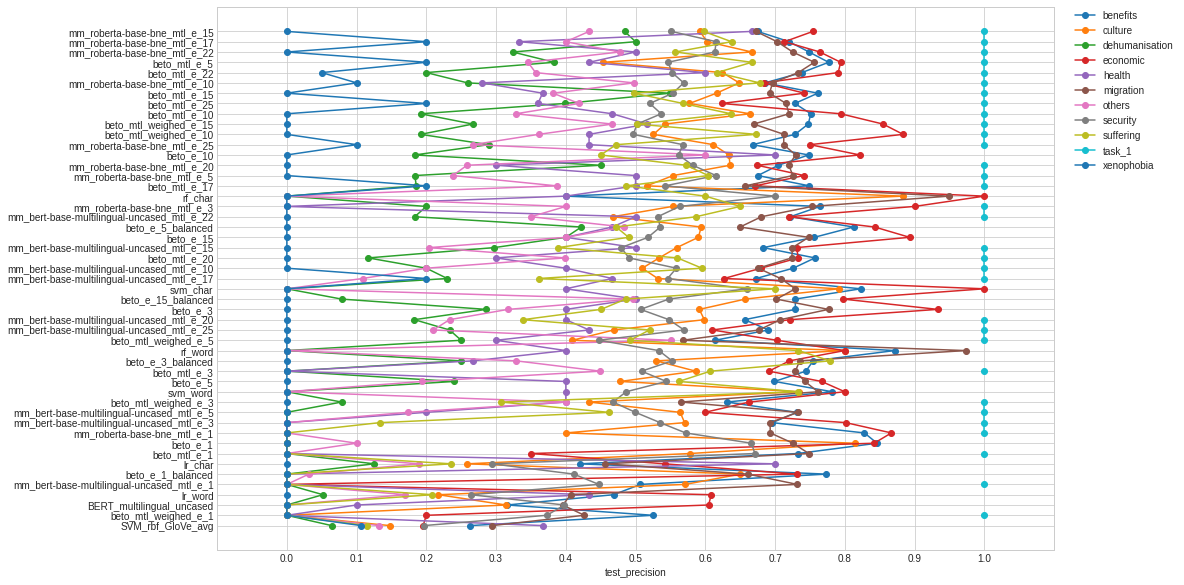

In [38]:
plt.figure(figsize=(15, 10))
metric = "test_precision"

df = data.pivot("model", "column", metric)\
.assign(mean = lambda df: df.iloc[:, 1:].mean(axis = 1))\
.sort_values("mean", ascending = True)\

for c in df.columns[:-1]:
    plt.plot(df[c], df.index, "o-", label = c)
    
plt.legend()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlim(-0.1, 1.1)
plt.xticks(np.linspace(0, 1, 11))
plt.xlabel(metric)
plt.show()

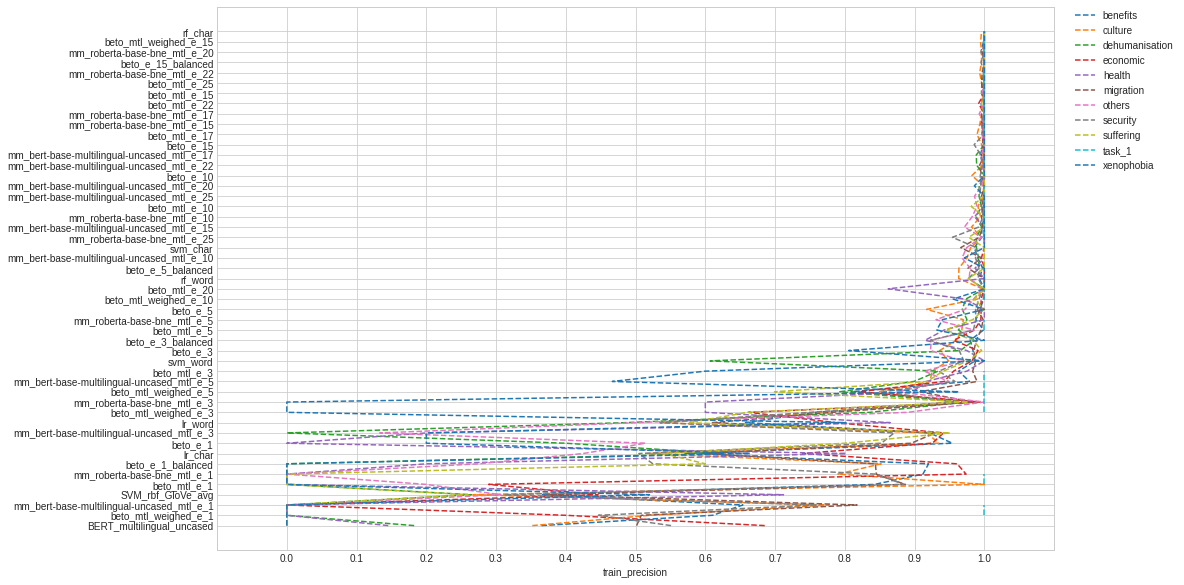

In [39]:
plt.figure(figsize=(15, 10))
metric = "train_precision"

df = data.pivot("model", "column", metric)\
.assign(mean = lambda df: df.iloc[:, 1:].mean(axis = 1))\
.sort_values("mean", ascending = True)\

for c in df.columns[:-1]:
    plt.plot(df[c], df.index, "--", label = c)
    
plt.legend()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlim(-0.1, 1.1)
plt.xticks(np.linspace(0, 1, 11))
plt.xlabel(metric)
plt.show()

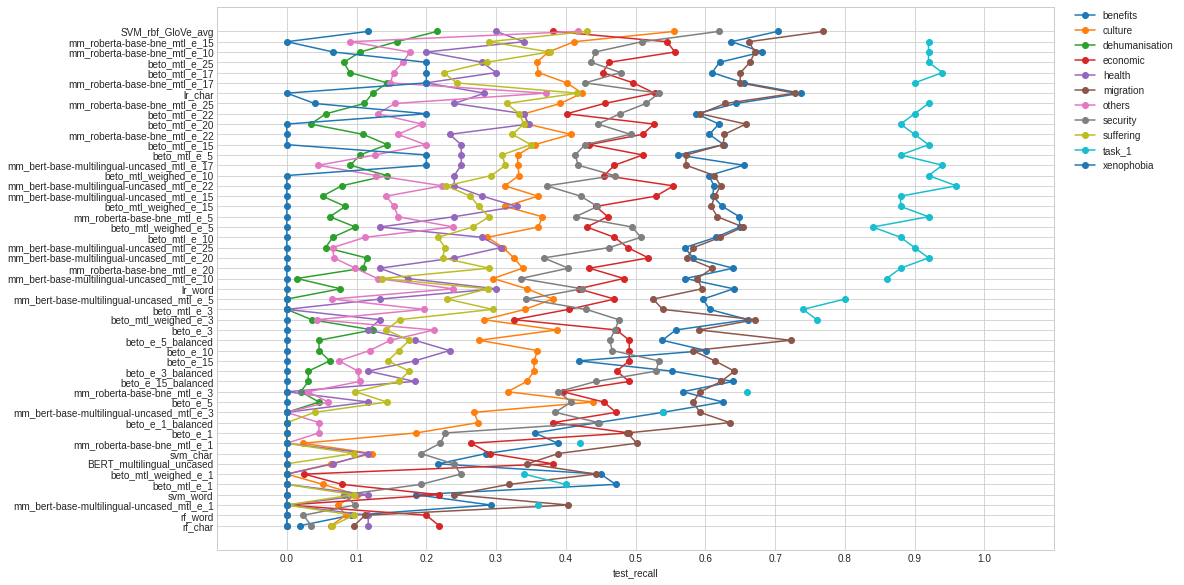

In [40]:
plt.figure(figsize=(15, 10))
metric = "test_recall"

df = data.pivot("model", "column", metric)\
.assign(mean = lambda df: df.iloc[:, 1:].mean(axis = 1))\
.sort_values("mean", ascending = True)\

for c in df.columns[:-1]:
    plt.plot(df[c], df.index, "o-", label = c)
    
plt.legend()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlim(-0.1, 1.1)
plt.xticks(np.linspace(0, 1, 11))
plt.xlabel(metric)
plt.show()

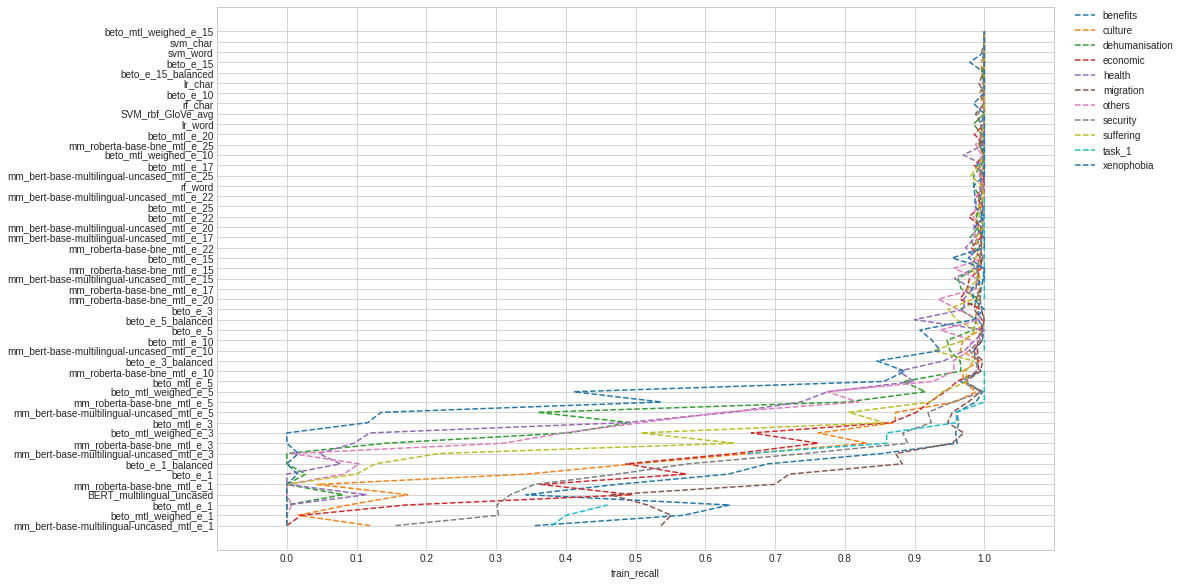

In [41]:
plt.figure(figsize=(15, 10))
metric = "train_recall"

df = data.pivot("model", "column", metric)\
.assign(mean = lambda df: df.iloc[:, 1:].mean(axis = 1))\
.sort_values("mean", ascending = True)\

for c in df.columns[:-1]:
    plt.plot(df[c], df.index, "--", label = c)
    
plt.legend()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlim(-0.1, 1.1)
plt.xticks(np.linspace(0, 1, 11))
plt.xlabel(metric)
plt.show()